In [1]:
# Statistical Inference Through Python Codes

In [2]:
import os
os.chdir("MyPath/Python/Chapter_05")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom,poisson,norm,t
import scipy.stats as st

In [3]:
# Binomial Likelihood

In [4]:
n = 10; x = 7
p_seq = np.arange(0,1.01,0.01)
lik_p = binom.pmf(x,n,p_seq)
plt.subplot(1,3,1)
plt.plot(p_seq,lik_p)
plt.xlabel("p")
plt.title("Binomial Likelihood Function")

In [5]:
# Poisson Likelihood

In [6]:
xp = [1,2,2,1,0,2,3,1,2,4]
lam_seq = np.arange(0,5.1,0.1)
plt.subplot(1,3,2)
plt.plot(lam_seq,poisson.pmf(sum(xp),len(xp)*lam_seq))
plt.xlabel('$\lambda$')
plt.title("Poisson Likelihood Function")

In [7]:
# Normal likelihood

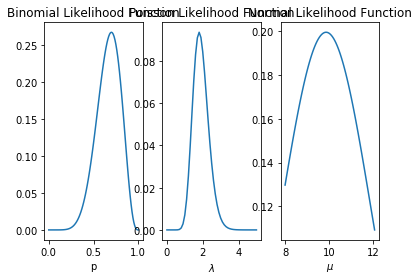

In [8]:
n = 25
nx = np.random.normal(10,2,n)
mu_seq = np.arange(8,12.05,0.05)
plt.subplot(1,3,3)
plt.plot(mu_seq,norm.pdf(np.mean(nx),mu_seq,2))
plt.xlabel('$\mu$')
plt.title("Normal Likelihood Function")
plt.show()

In [9]:
# Confidence Intervals

In [10]:
def binom_CI(x,n,alpha):
    phat = x/n
    ll=phat-norm.ppf(1-alpha/2)*np.sqrt(phat*(1-phat)/n)
    ul=phat+norm.ppf(1-alpha/2)*np.sqrt(phat*(1-phat)/n)
    print("Binomial Lower Confidence Limit: ",max(0,ll))
    print("Binomial Upper Confidence Limit: ",min(1,ul))
binom_CI(x=7,n=10,alpha=0.01)

Binomial Lower Confidence Limit:  0.326726871284
Binomial Upper Confidence Limit:  1


In [11]:
def normal_CI_ksd(x,sigma,alpha):
    xbar = np.mean(x)
    n = len(x)
    ll = xbar - norm.ppf(1-alpha/2)*sigma/np.sqrt(n)
    ul = xbar + norm.ppf(1-alpha/2)*sigma/np.sqrt(n)
    print("Normal Lower Confidence Limit: ",ll)
    print("Normal Upper Confidence Limit: ",ul)
n=25
nx = np.random.normal(10,2,n)
normal_CI_ksd(nx,2,0.05)

Normal Lower Confidence Limit:  8.99580732593
Normal Upper Confidence Limit:  10.5637785136


In [12]:
def normal_CI_uksd(x,alpha):
    xbar = np.mean(x); n = len(x)
    xsd = np.std(x)*np.sqrt(n/(n-1))
    ll = xbar - t.ppf(1-alpha/2,n-1)*xsd/np.sqrt(n)
    ul = xbar + t.ppf(1-alpha/2,n-1)*xsd/np.sqrt(n)
    print("Normal Lower Confidence Limit: ",ll)
    print("Normal Upper Confidence Limit: ",ul)
nx = np.random.normal(10,2,n)
normal_CI_uksd(nx,0.05)

Normal Lower Confidence Limit:  9.6983574143
Normal Upper Confidence Limit:  11.4359105478


In [13]:
# Hypothesis Testing in Python

In [14]:
# Binomial Test

In [15]:
n_lcd = 893; x_lcd = 39; p_lcd = 0.04
from scipy.stats import binom_test
binom_test(x=x_lcd,n=n_lcd,p=p_lcd)

0.54977099798723161

In [16]:
# Proportion Test

In [17]:
Male_Admit = [512, 353, 120, 138,  53,  22]
Male_Applied = [825, 560, 325, 417, 191, 373]
Female_Prop = np.array([0.824, 0.680, 0.341, 0.349, 0.239, 0.070])
from statsmodels.stats.proportion import proportions_chisquare
proportions_chisquare(count = Male_Admit, nobs=Male_Applied,value=Female_Prop)

(245.68193179139814, 3.4322059672585922e-50, (array([[512, 313],
         [353, 207],
         [120, 205],
         [138, 279],
         [ 53, 138],
         [ 22, 351]]), array([[ 679.8  ,  145.2  ],
         [ 380.8  ,  179.2  ],
         [ 110.825,  214.175],
         [ 145.533,  271.467],
         [  45.649,  145.351],
         [  26.11 ,  346.89 ]])))

In [18]:
# Normal test: One sample Z-test

In [19]:
def z_test(x,mu,sd,alternative):
    import scipy
    xmean = x.mean(); n = len(x)
    ztest = np.sqrt(n)*(xmean-mu)/sd
    if alternative=="less":
        pvalue = scipy.stats.norm.cdf(ztest)
    if alternative=="greater":
        pvalue = 1-scipy.stats.norm.cdf(ztest)
    if alternative=="two.sided":
        pvalue = 2*(1-scipy.stats.norm.cdf(ztest))
    print("The Z-test Value is :",ztest)
    print("The p-value is :",pvalue)

In [20]:
pH_Data = np.array([8.30,8.42,8.44,8.32,8.43,8.41,8.42,8.46,8.37,8.42]) 
z_test(x=pH_Data,mu=8.4,sd=0.05,alternative="less")

The Z-test Value is : -0.0632455532034
The p-value is : 0.474785485576


In [21]:
LCD_Data = np.array([13.37, 10.96, 12.06, 13.82, 12.96, 10.47,10.55,
                     16.28, 12.94, 11.43, 14.51, 12.63, 13.50, 11.50, 12.87])
z_test(x=LCD_Data,mu =12, sd =2,alternative="greater")

The Z-test Value is : 1.271629532
The p-value is : 0.101752389402


In [22]:
peanuts = np.array([8.08, 7.71, 7.89, 7.72, 8.00, 7.90, 7.77, 7.81,
                    8.33, 7.67, 7.79, 7.79, 7.94, 7.84, 8.17, 7.87])
z_test(x=peanuts,mu=8,sd=0.03,alternative="two.sided")

The Z-test Value is : -14.3333333333
The p-value is : 2.0


In [23]:
# Normal test: Two sample Z-test

In [24]:
def z_test_two_samples(x1,x2,s1,s2,alternative,delta):
    import scipy
    x1mean = x1.mean(); n1 = len(x1)
    x2mean = x2.mean(); n2 = len(x2)
    pooled_var = np.sqrt(s1**2/n1+s2**2/n2)
    ztest = (x1mean-x2mean-delta)/pooled_var
    if alternative=="less":
        pvalue = scipy.stats.norm.cdf(ztest)
    if alternative=="greater":
        pvalue = 1-scipy.stats.norm.cdf(ztest)
    if alternative=="two.sided":
        pvalue = 2*(1-scipy.stats.norm.cdf(ztest))
    print("The Z-test Value is :",ztest)
    print("The p-value is :",pvalue)
    print("The pooled variance is:",pooled_var)

In [25]:
pH_Data = np.array([8.30, 8.42, 8.44, 8.32, 8.43, 8.41,
                    8.42,  8.46, 8.37, 8.42])
pH_New = np.array([8.78, 8.85, 8.74, 8.83, 8.82, 8.79, 
                   8.82, 8.74, 8.84, 8.78, 8.75, 8.81])
z_test_two_samples(x1=pH_Data,x2=pH_New,s1=0.05,s2=0.05,
                   alternative="less",delta=0)

The Z-test Value is : -18.5360598605
The p-value is : 5.28434370461e-77
The pooled variance is: 0.0214087209644


In [26]:
length_M1 = np.array([122.4, 123.12, 122.51, 123.12, 122.55,
                      121.76, 122.31, 123.2, 122.48, 121.96])
length_M2 = np.array([122.36, 121.88, 122.2, 122.88, 123.43,
                      122.4, 122.12, 121.78, 122.85, 123.04])
z_test_two_samples(x1=length_M1,x2=length_M2,s1=0.5,s2=0.5,
                   alternative="two.sided",delta=0)

The Z-test Value is : 0.210190389885
The p-value is : 0.833519079794
The pooled variance is: 0.22360679775
